## Optime V1: YOLOv8 Object Detection on a Custom Dataset

In [1]:
!nvidia-smi

Sun Jan 21 07:58:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.3
    Uninstalling ultralytics-8.1.3:
      Successfully uninstalled ultralytics-8.1.3


## Install YOLOv8

In [1]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


## Train YOLOv8 Model on Custom Dataset

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="l8lohpnt7mBdV7ustYIq")
project = rf.workspace("optim-xpqw6").project("optim")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Optim-1 in yolov8:: 100%|██████████| 434/434 [00:00<00:00, 3812.60it/s]


In [7]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

New https://pypi.org/project/ultralytics/8.1.3 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Optim-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agno

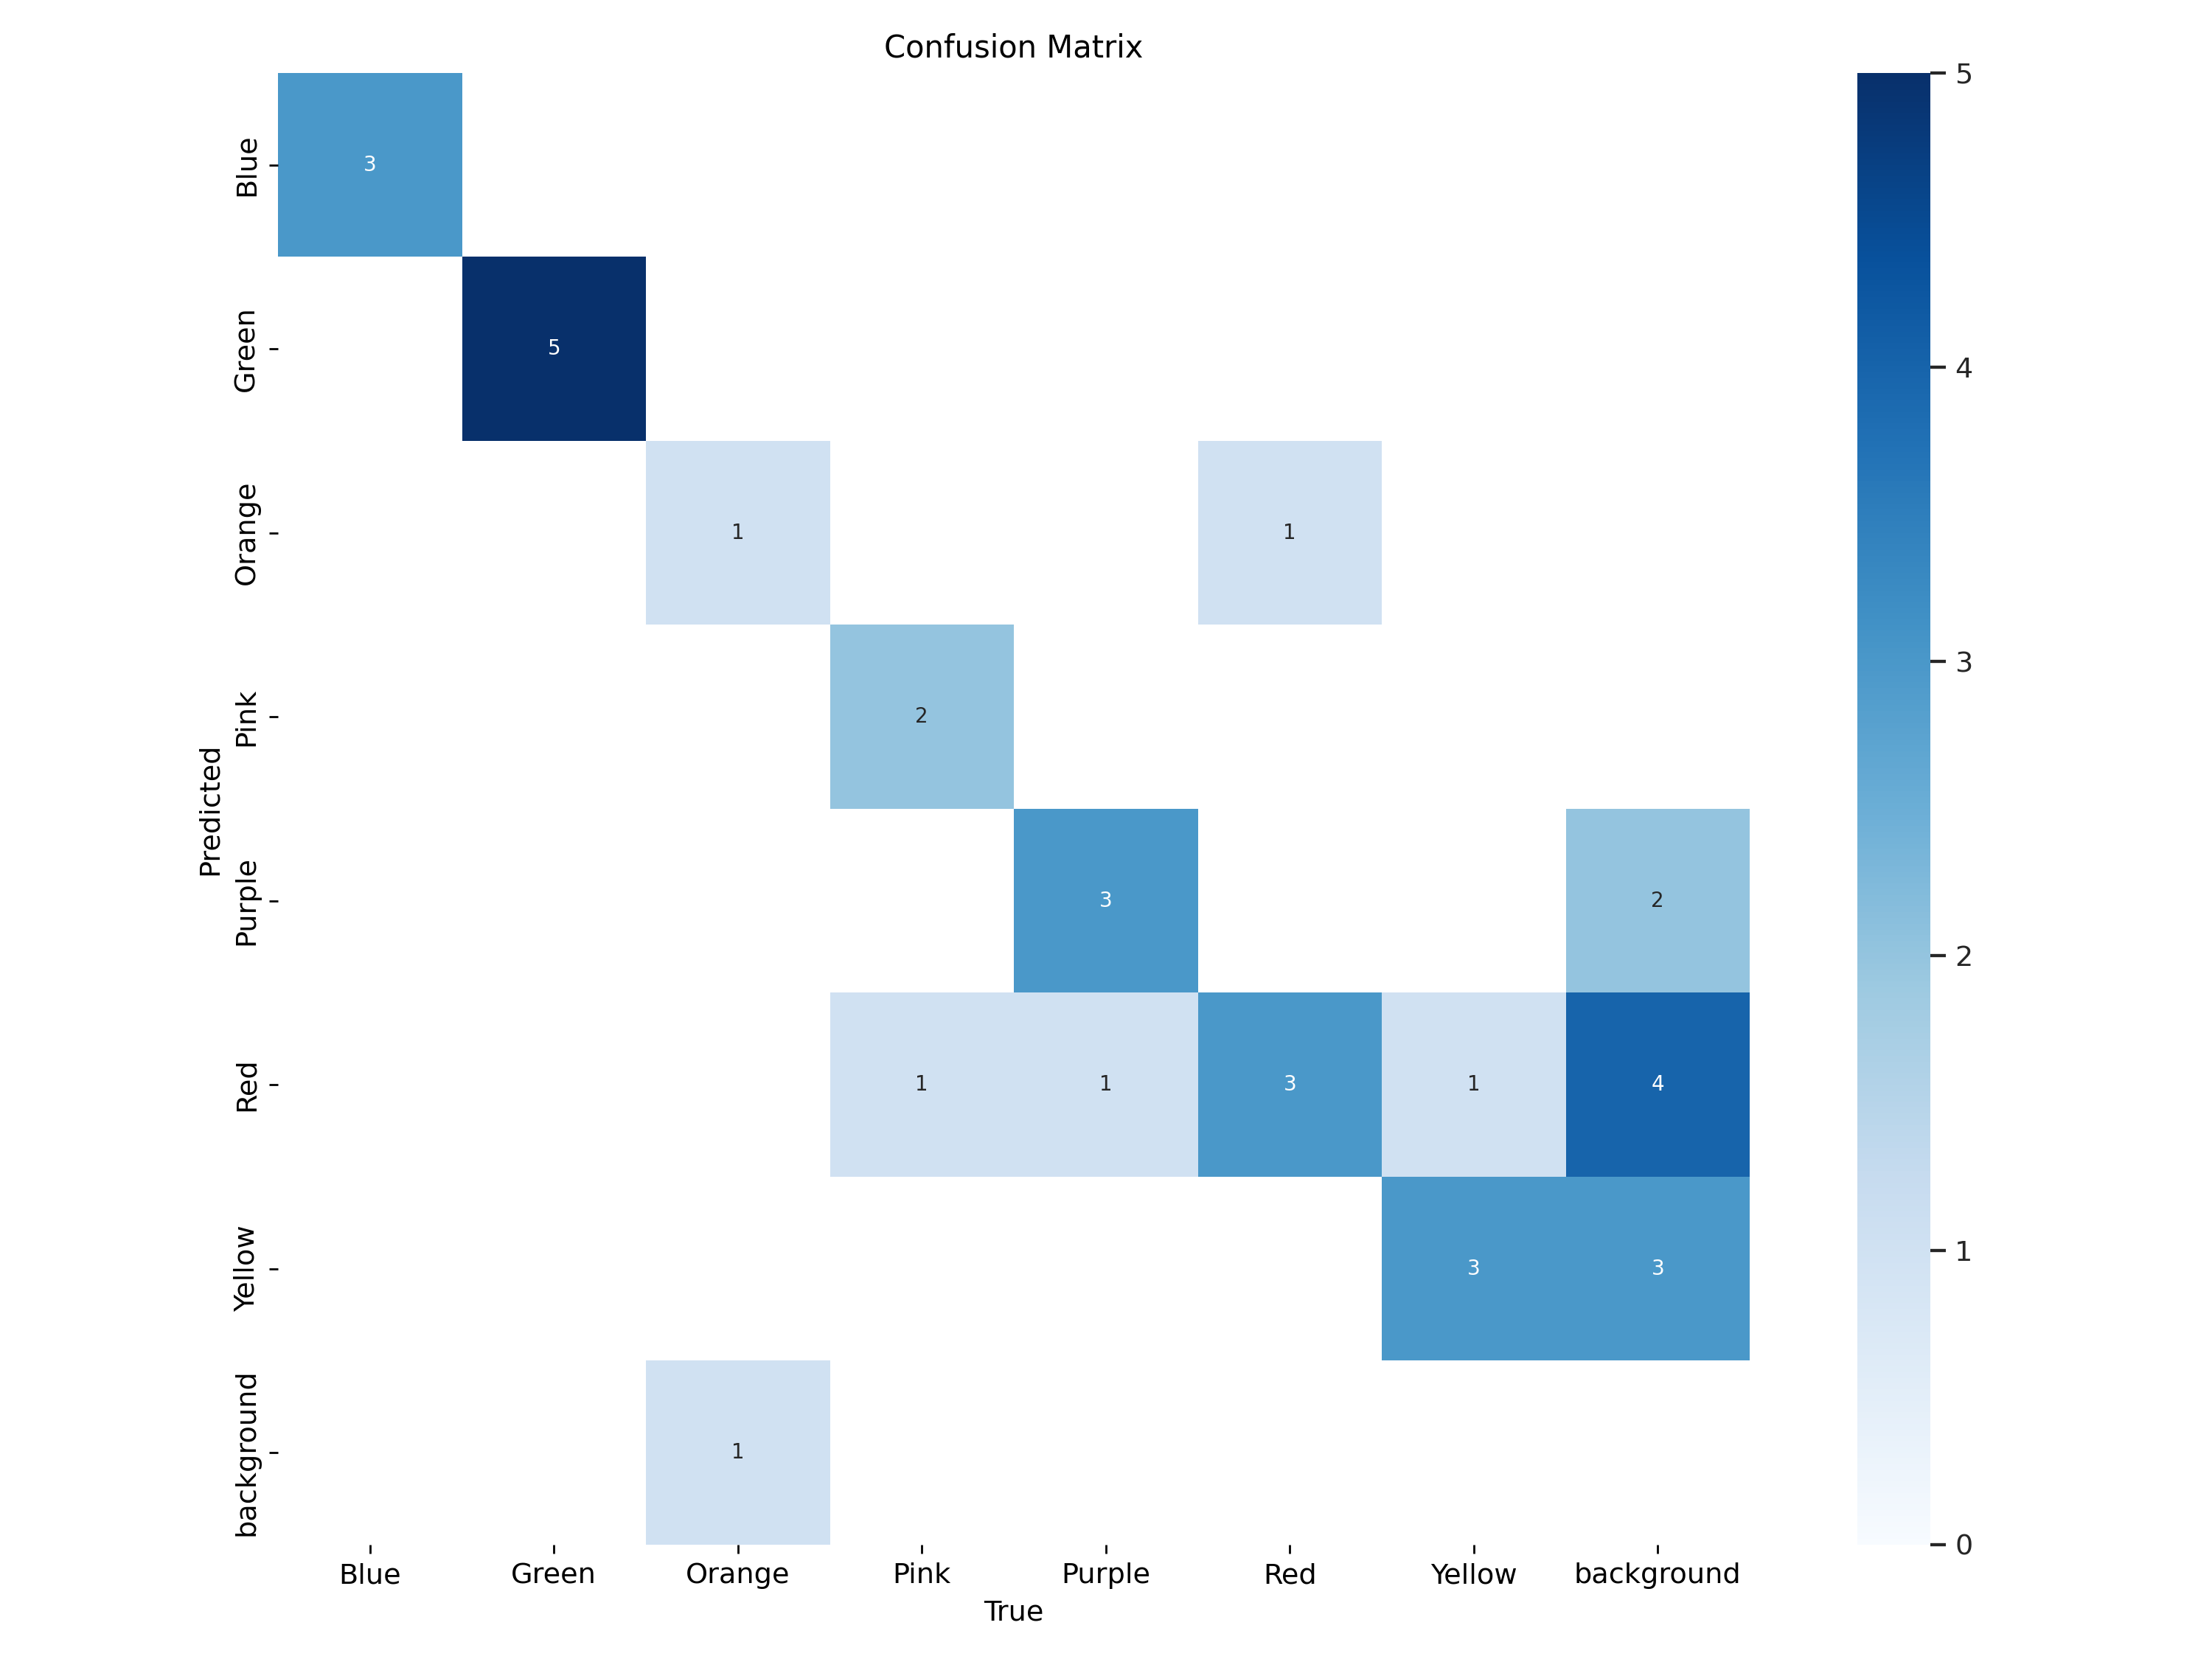

In [8]:
Image(filename=f'/content/runs/detect/train5/confusion_matrix.png', width=600)

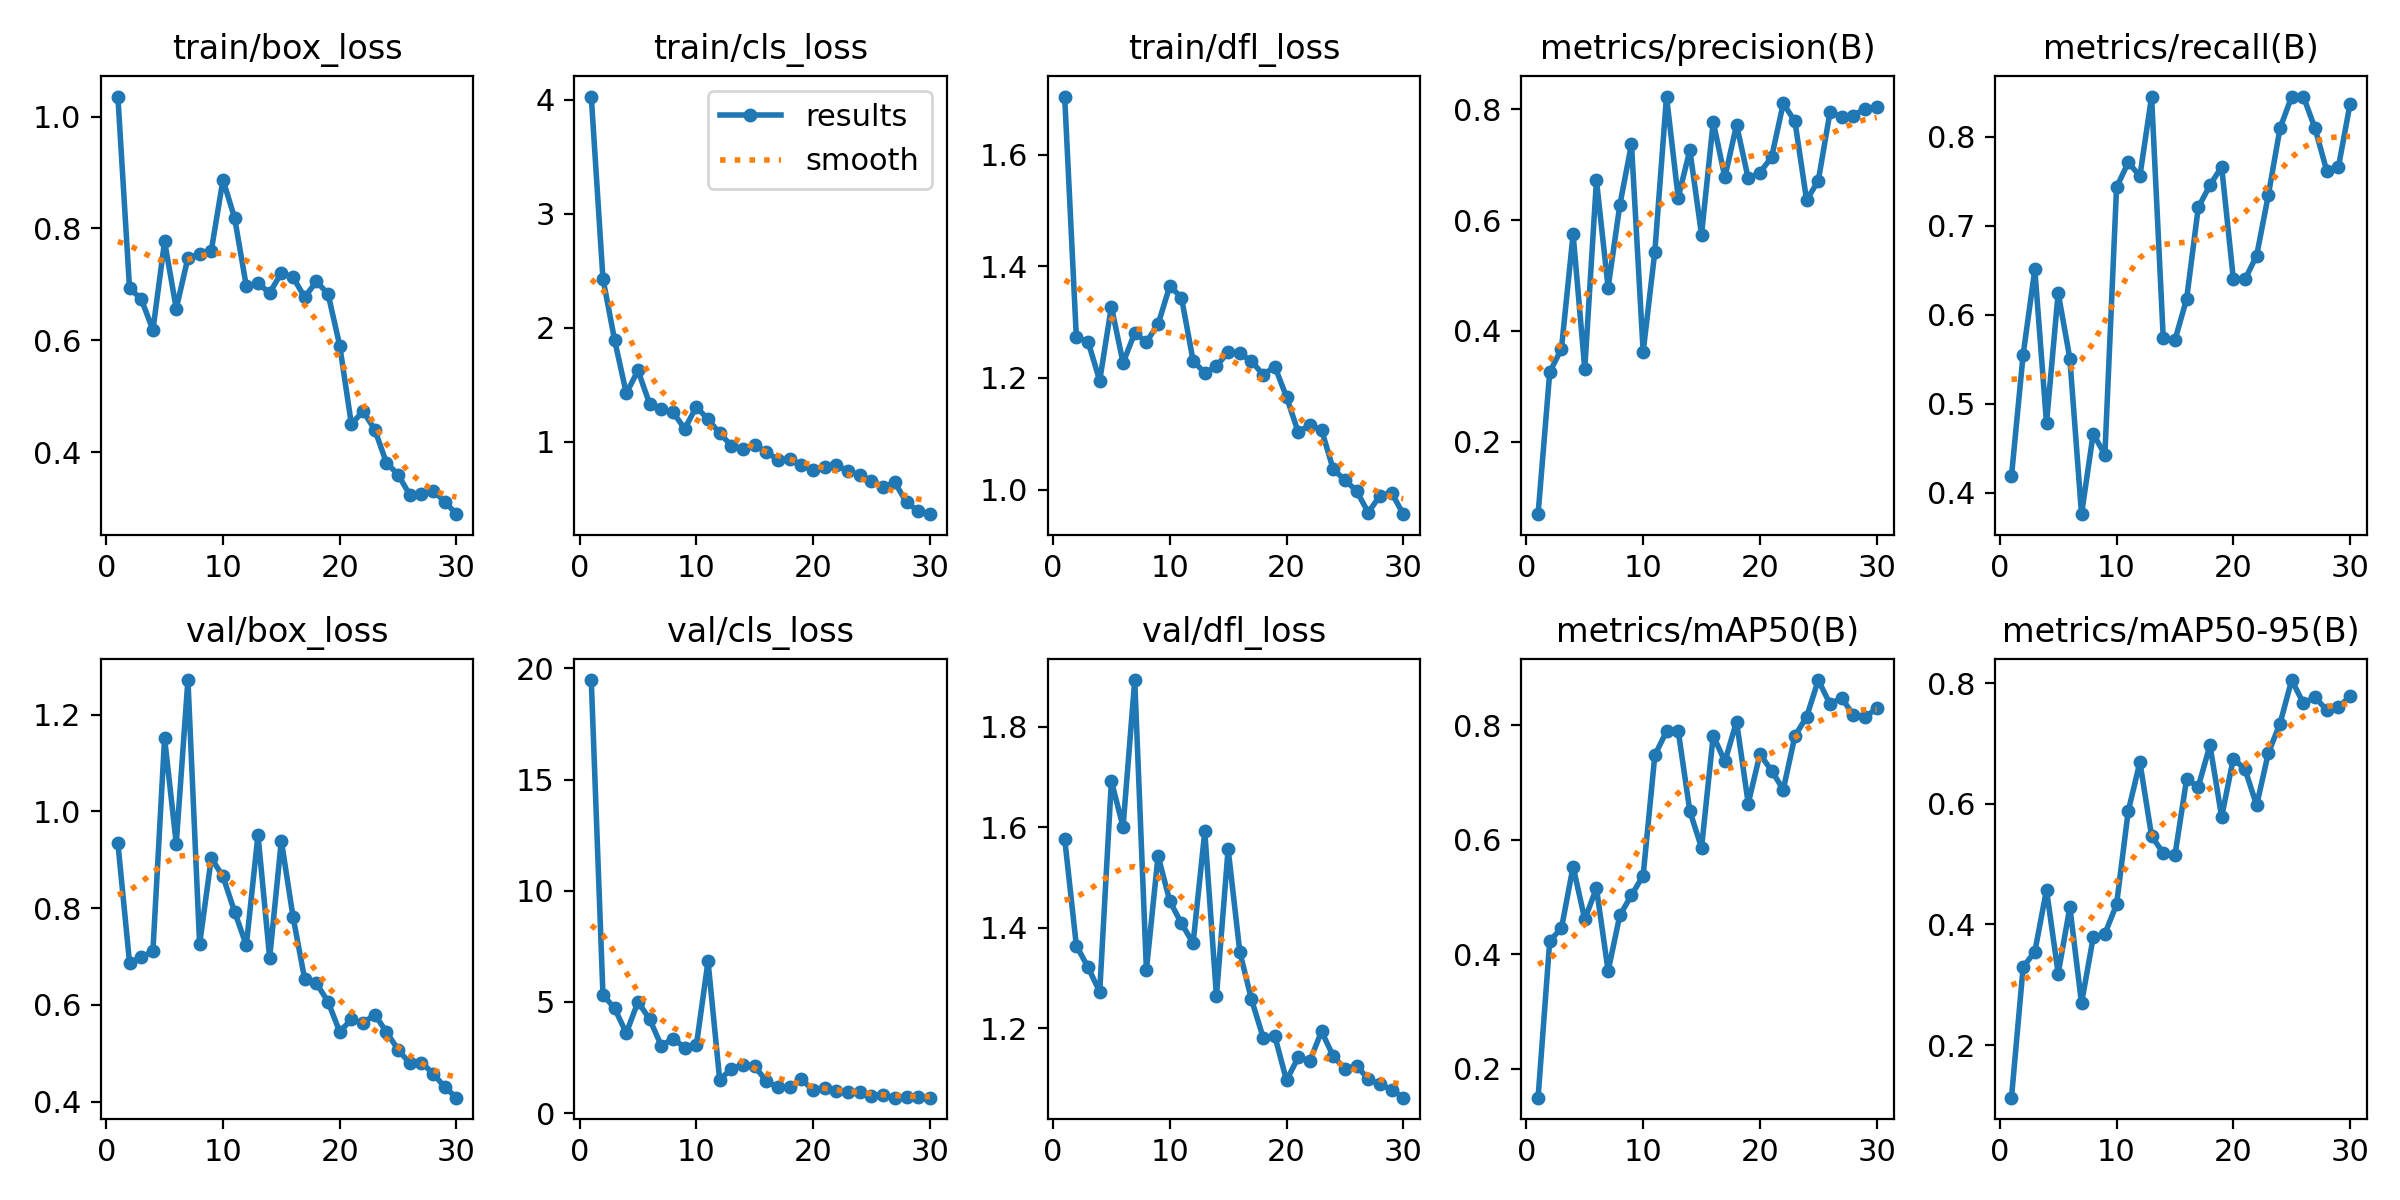

In [10]:
Image(filename=f'/content/runs/detect/train5/results.png', width=600)

In [11]:
!yolo task=detect mode=val model=/content/runs/detect/train5/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Optim-1/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100% 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.06s/it]
                   all         25         25      0.671      0.845      0.879      0.805
                  Blue         25          3      0.652          1      0.995      0.837
                 Green         25          5      0.878          1      0.995      0.936
                Orange         25          2      0.545        0.5      0.497      0.447
                  Pink         25          3      0.957      0.667      0.913      0.855
                Purple         25          4       0.72          1      0.995      0.921
                   Red         25          4       0.45

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt conf=0.25 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/12 /content/Optim-1/test/images/1000_F_403725677_vpoMekTAXXSp3TjPHiii8vaChuNTAeSw_jpeg.rf.077acccd4bde5476579e27ce18e03f20.jpg: 640x640 1 Blue, 38.0ms
image 2/12 /content/Optim-1/test/images/205074860-pink-t-shirt-hanging-on-hanger-with-plant-on-color-background_jpeg.rf.32ae2c25c6755197ab994bef9f899e25.jpg: 640x640 1 Pink, 37.1ms
image 3/12 /content/Optim-1/test/images/210704255-stylish-purple-t-shirt-hanging-on-green-background_jpeg.rf.732ffec4504d3944389a0a0c6820c58e.jpg: 640x640 1 Green, 1 Purple, 37.0ms
image 4/12 /content/Optim-1/test/images/61qgHeACcNL-_AC_UF350-350_QL80__jpg.rf.b8cd46127e1063cbf148776a77f7d163.jpg: 640x640 1 Purple, 37.1ms
image 5/12 /content/Optim-1/test/images/DIOR_Chez_Moi_Silk_Shirt_Pink_36-1__21193_jpeg.rf.d700a9e51dddf41debe04039129c1299.jp

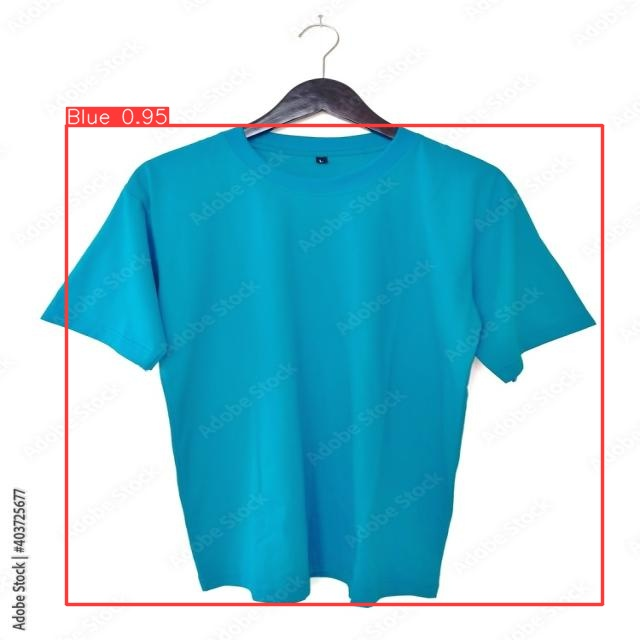

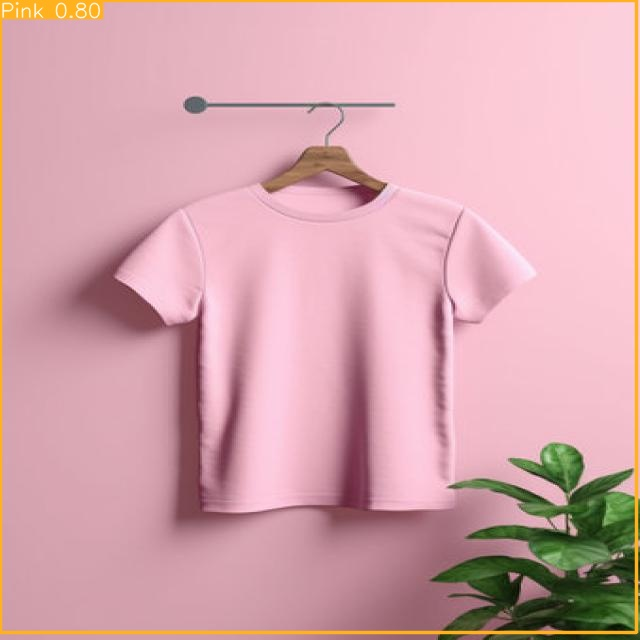

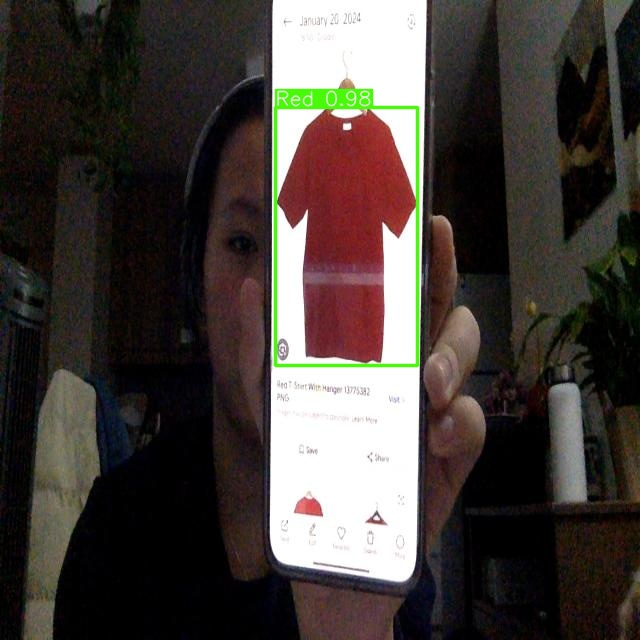

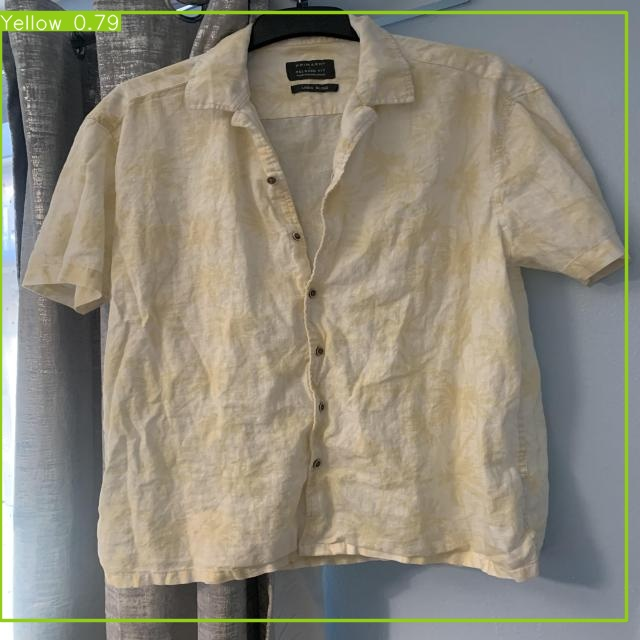

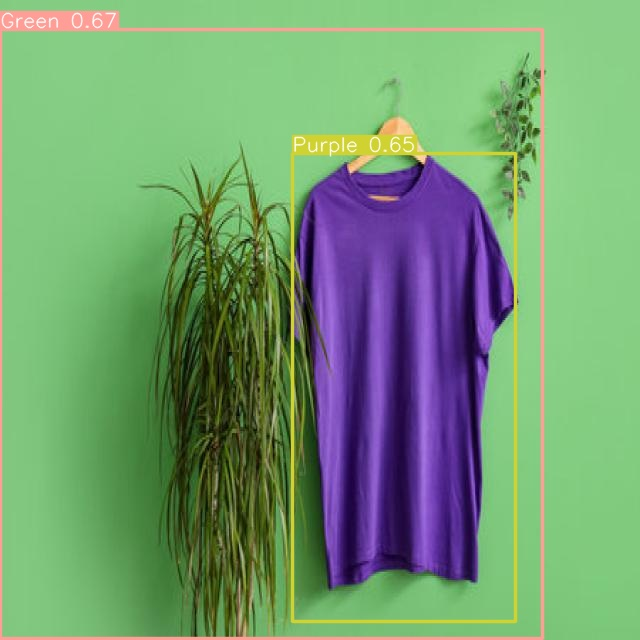

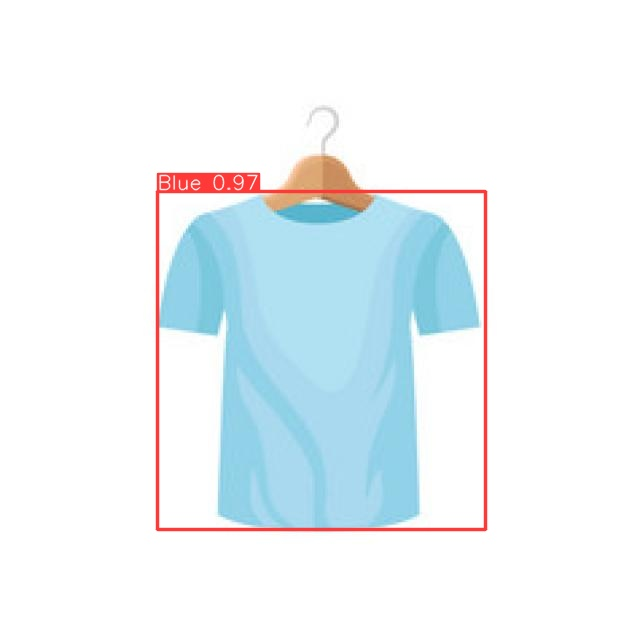

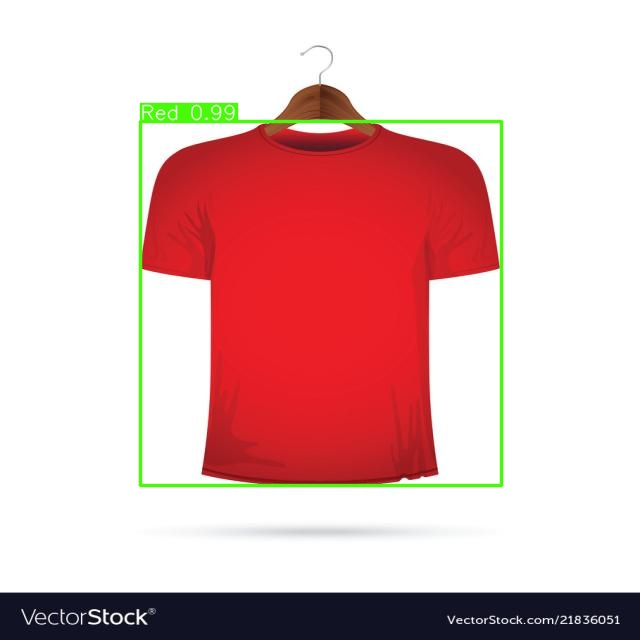

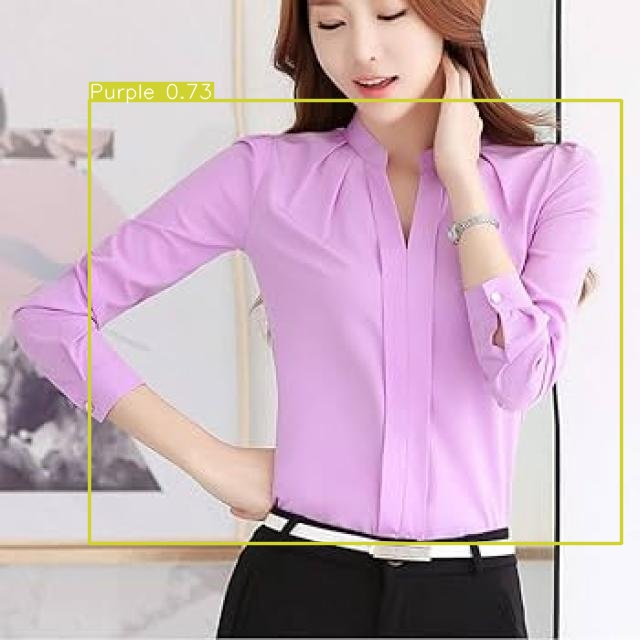

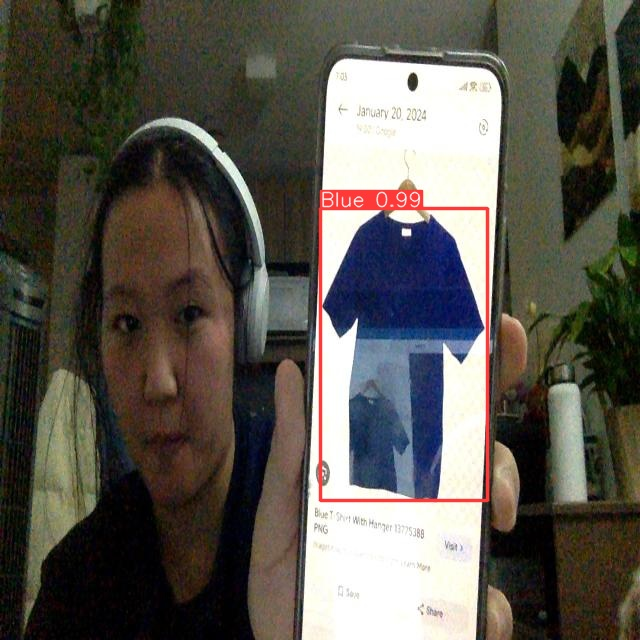

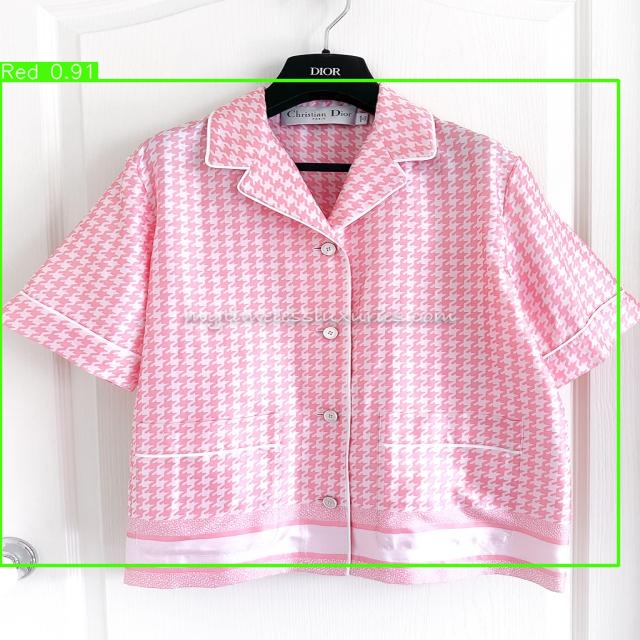

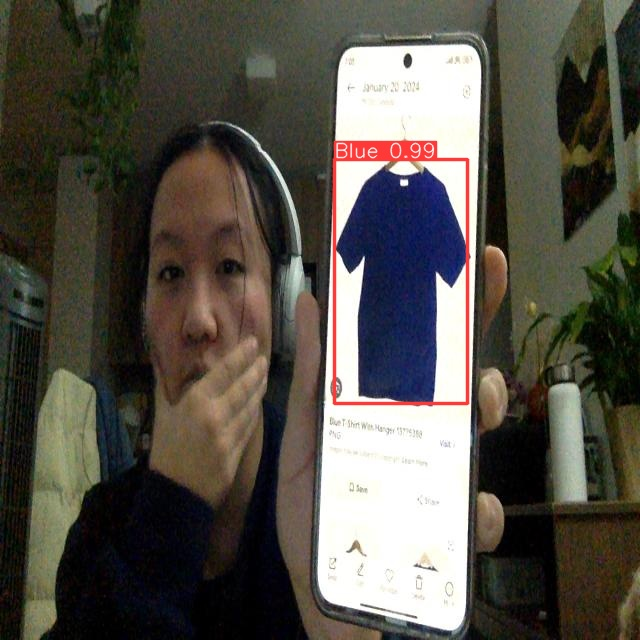

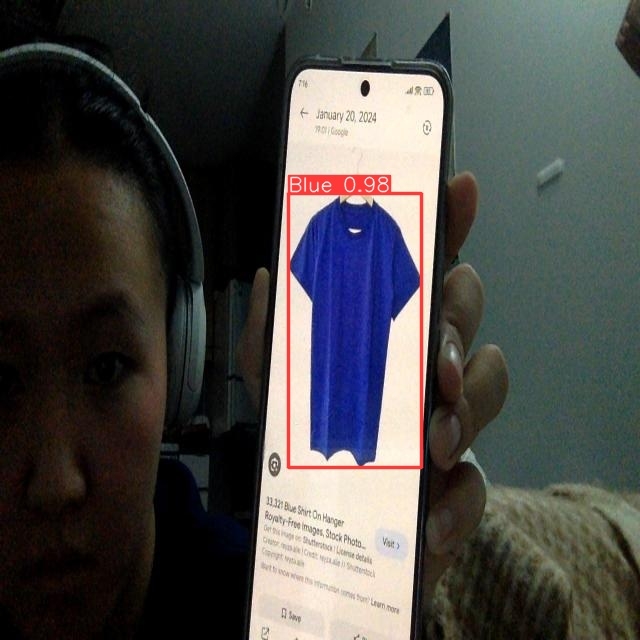

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")